In [30]:
from __future__ import print_function

import tensorflow as tf

batch_size = 128
num_classes = 10
epochs = 20


In [31]:
#data is randomly split into training and test set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#data preprocessing
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalization
x_train /= 255
x_test /= 255


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [32]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [33]:
# Select and define the model
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
RMSprop = tf.keras.optimizers.RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [34]:
# compile and fit the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================]60000/60000 [==============================] - 8s 126us/step - loss: 0.2467 - acc: 0.9242 - val_loss: 0.1099 - val_acc: 0.9655

Epoch 2/20
60000/60000 [==============================]60000/60000 [==============================] - 7s 119us/step - loss: 0.1046 - acc: 0.9681 - val_loss: 0.0913 - val_acc: 0.9741

Epoch 3/20
60000/60000 [==============================]60000/60000 [==============================] - 7s 119us/step - loss: 0.0765 - acc: 0.9772 - val_loss: 0.0762 - val_acc: 0.9772

Epoch 4/20
60000/60000 [==============================]60000/60000 [==============================] - 7s 119us/step - loss: 0.0610 - acc: 0.9820 - val_loss: 0.0857 - val_acc: 0.9751

Epoch 5/20
60000/60000 [==============================]60000/60000 [==============================] - 7s 120us/step - loss: 0.0515 - acc: 0.9847 - val_loss: 0.0737 - val_acc: 0.9814

Epoch 6/20
60000/60000 [===========

In [35]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10354267877732165
Test accuracy: 0.9846


In [84]:
# store accuracy and loss for plot

history.history.keys()


dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

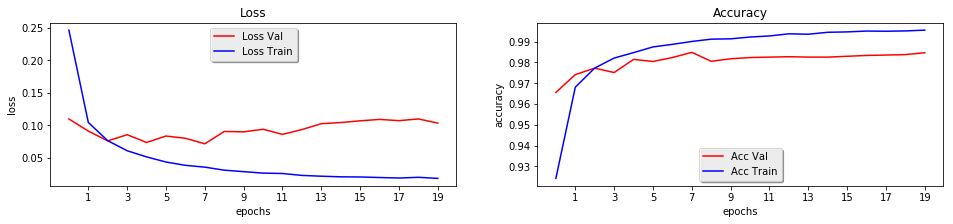

In [83]:
# plot accuracy and loss over epoch
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(20)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 3))

#figure 1
y1 = history.history['val_loss']
y2 = history.history['loss']

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.set_xticks(np.arange(1, 20, 2))

ax1.set_title("Loss")
ax1.plot(x, y1, 'r')
ax1.plot(x, y2, 'b')
ax1.legend(('Loss Val', 'Loss Train', 'Total message length'),
           loc='upper center', shadow=True)
#figure 2
y1 = history.history['val_acc']
y2 = history.history['acc']

ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.set_xticks(np.arange(1, 20, 2))

ax2.set_title("Accuracy")
ax2.plot(x, y1, 'r')
ax2.plot(x, y2, 'b')
ax2.legend(('Acc Val', 'Acc Train', 'Total message length'),
           loc='lower center', shadow=True)

plt.show()